<a href="https://colab.research.google.com/github/NikhilaKomati/IT-7103/blob/main/End_to_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An End-to-End Machine Learning Project

This notebook demonstrates an example of an end-to-end machine learning project. You will be instroduced to the following steps:
- Preliminary analysis
- Data preprocessing
- Model training and tuning
- Model selection

## The Problem

In this assignment, we will practice loading datasets from Pandas, visualization, and writing processing pipelines. We will work with the auto-mpg data in which each row carries information for a car model. The data has the following columns:

1.	mpg   -          	Mile per gallon rate of the car
2.	cylinders -    	Number of cylinders the car has
3.	displacement: 	Displacement of the car
4.	horsepower:    	Horsepower of the car
5.	weight:        	Weight of the car
6.	acceleration:  	Acceleration of the car
7.	model year:    	The year the car was introduced
8.	origin:        	The development location of the car (number codes represent Asia, Europe, and North America)
9.	car name:      	Model name of the car (unique for each car model)

## Loading the Data

This data is a typical csv file with headers. We can use the default settings of `read_csv()`. We can then use `head()` to examine the data.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

attr = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')
attr.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


As discuss, the `shape` attribute quickly shows the number of rows and columns of the dataframe

In [49]:
attr.shape

(398, 9)

## First Look into the Data

As previously mentioned, we can use `dtypes` for a list of each column's data type. Another similar method that provides more information is `DataFrame.info()` which will give the number of rows and columns, non-null count (non-missing) and column types.

Take note on the non-null count; any column with a non-null count less than the total number of rows in the dataset means it has missing values that we must handle later on.

Our target in this data is **car name**

In [50]:
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Based on the results from `info()`, the majority of the columns are considered numeric (indicated by the `int64` or `float64` type). "car name" is considered class (indicated by the object type).

Did this data get loaded in correctly?


# Train-Test Split

A quick look into the data is all you should done before train/test splitting.

As we mentioned in the first module, a machine learning model is usually trained to work on future unknown data. For this reason, we need some measurements that are able to reflect its performance on unknown data instead of the data the model is trained on. This leads to train/test splitting -- we split the dataset we have into a training set for model training, and a testing set that will be kept untouch until we have finalized and trained models.

This means, every steps from now, including visualization and processing, are performed in the training set. The testing set will be kept untouch until we are ready to evaluate our models.

There are different ways of splitting a data. In this example, we will do random split. We will use `train_test_split()` from `scikit-learn` for this action. We need to provide the input dataset, and the ratio of `training:testing` sizes. Let's note their number of rows since they are important information

In [51]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(attr, test_size=0.25) #test_size=0.25 means that 25% of data will be for testing, 75% for training
traindata.shape, testdata.shape

((298, 9), (100, 9))

## Preliminary Analysis

We can now look into the training data for more information. In this step, we can use various statistics and charts to summarize information.

For statistics, we use `describe()`. We can see all the numeric columns have some **missing values** which is indicated by the count being less than the training data size.

Later one, we have to deal with missing values through a process called **imputation**.

In [52]:
traindata.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,298.000000,298.000000,298.000000,293.000000,298.000000,298.000000,298.000000,298.000000
mean,23.365101,5.496644,195.370805,104.532423,2984.265101,15.539933,75.973154,1.570470
std,7.700089,1.715935,103.545128,37.478804,846.453548,2.830364,3.727135,0.801976
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,104.250000,76.000000,2224.250000,13.850000,73.000000,1.000000
50%,22.450000,4.000000,151.000000,95.000000,2866.500000,15.450000,76.000000,1.000000
75%,28.700000,8.000000,293.250000,129.000000,3631.500000,17.275000,79.000000,2.000000
max,44.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


However, numbers are not too intuitive to look at. We can further observe their distributions with histograms and boxplots

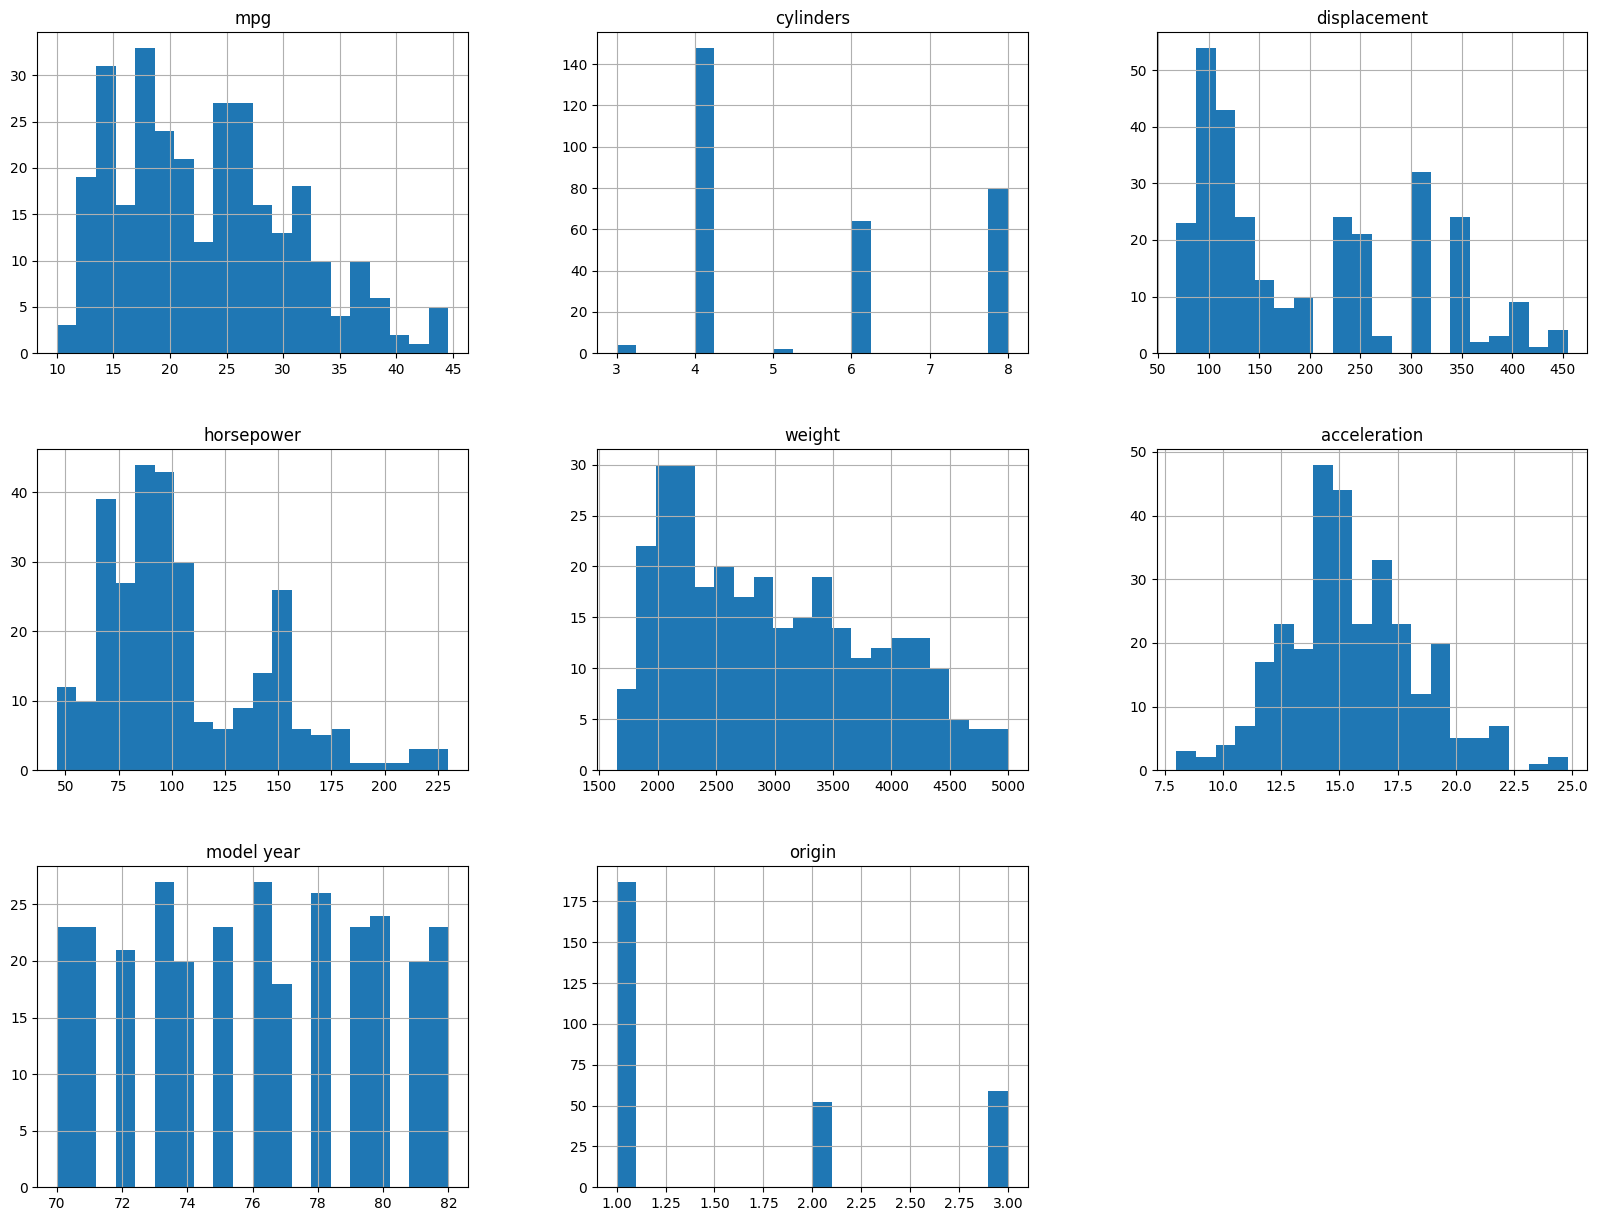

In [53]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

Quite a few columns are skewed. We need to note them down for later.

Next, for drawing boxplots, we need to provide a list of numeric columns. This can be done by filter to columns with types of `int64` or `float64`. Now, you can see the importance of having columns loaded in to their correct types.

Another note is that "ID" columns are usually not of interests.as there is no "ID" coloumns in the code we need not to remove any coloumn.

In [54]:
num_cols = [column for column in attr.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

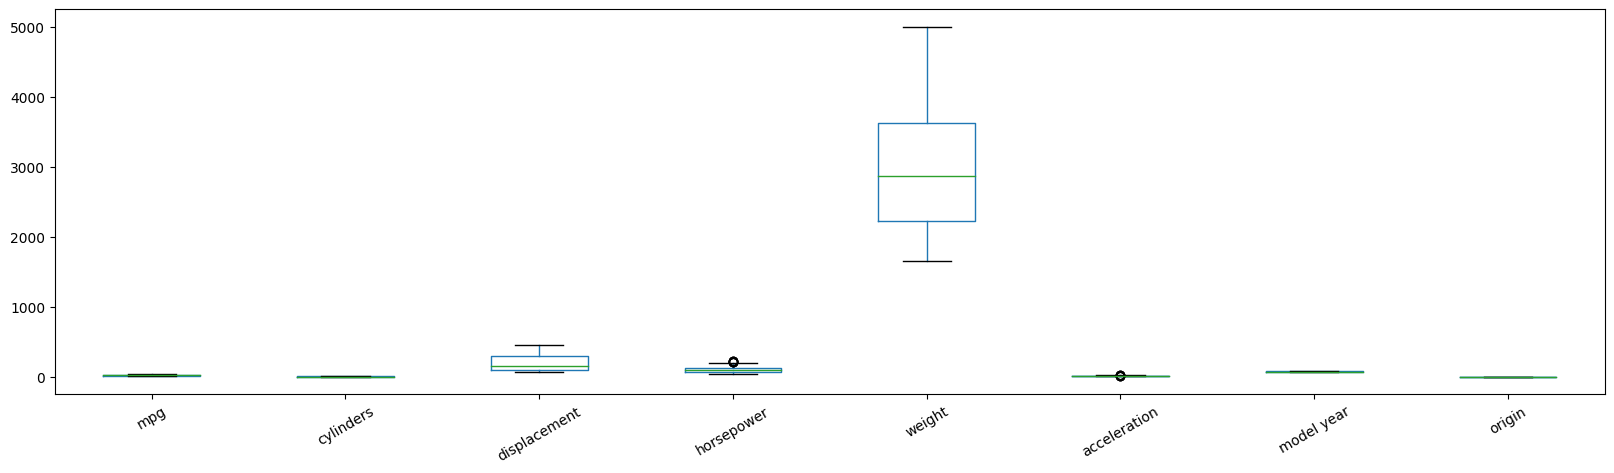

In [55]:
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

With a boxplot, we can clearly see that the numeric columns have very different ranges. This will need to be addressed in preprocessing with a process called **standardization**.

Finally, for categorical columns, we can filter all that has `dtypes` of `object`

In [56]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['car name']

Then draw a bar chart for each column

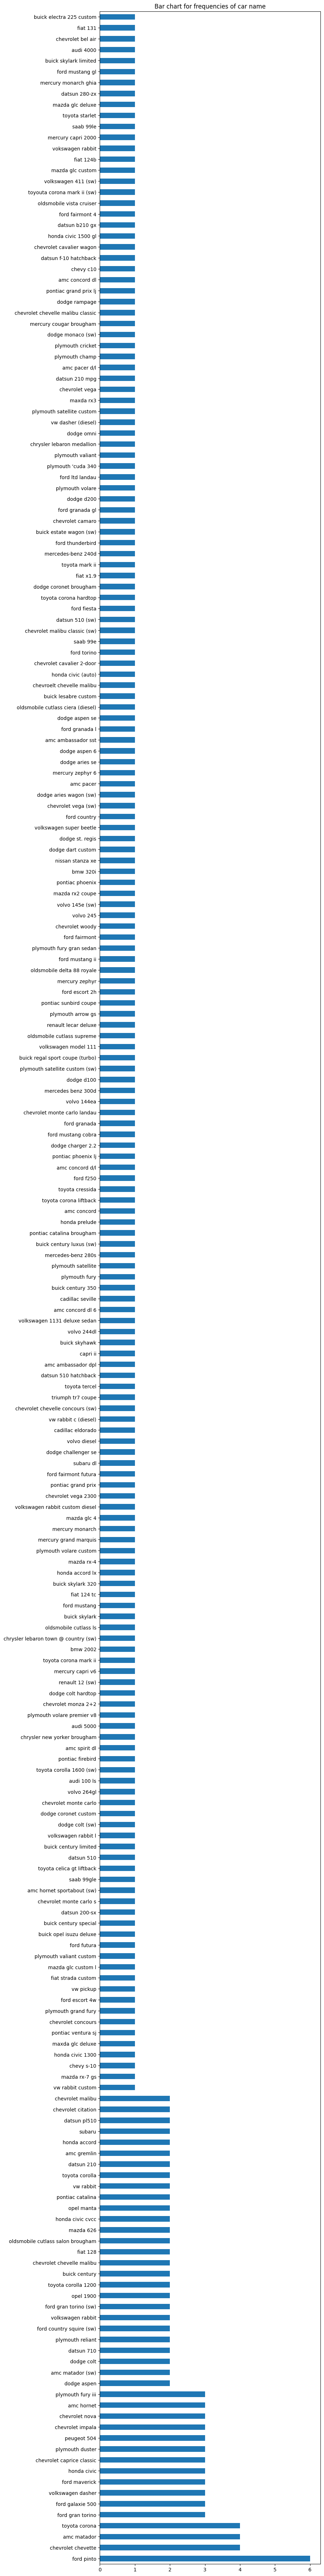

In [57]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (8,len(freq_table)*0.4)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

# Preprocessing

We will utilize a highly powerful tool called a pipeline that comes with scikit-learn for preprocessing. A pipeline allows us to construct a set of data transformations that simplify this step by orders of magnitude. In the following module, we will spend more time discussing pipelines.

The data in this project will be changed as follows:

Imputation of missing values in symmetric numeric columns --> Normalization
Imputation --> log transformation --> normalization for skewed numeric columns
Categorical columns with a single hot encoder
As a result, we must provide the columns for each type of change. Any columns that are not included here will be removed from the processed data.

**Very Important: The target should not be included in any of the input lists.**

In [58]:
num_cols = ['mpg','acceleration']                                             #this list is for symmetric numeric columns
log_cols = ['displacement','horsepower','weight']   #this list is for skewed numeric columns
cat_cols = ['car name']               #this list for the class columns
target = 'car name'                                                                                                          #this is the name of the target

In [59]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [60]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['mpg', 'acceleration']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7d4acf5b91b0>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['displacement', 'horsepower', 'weight']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['car name'])])

Here we use fit() with processing_pipeline for training the data and shape() to print the shape of both training data and test data.

In [61]:
#fitting the pipeline to the training data
trainingdata_processed = processing_pipeline.fit_transform(traindata)
trainingdata_processed

#Transforming the training and testing data
trainingdata_processed = processing_pipeline.transform(traindata)
testdata_processed = processing_pipeline.transform(testdata)

#Printing the shape of the processed training and testing data
trainingdata_processed.shape, testdata_processed.shape

((298, 10), (100, 10))